In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the Data set
df=pd.read_csv('Group_14_Clean_Data.csv')
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,280.2195,319.1130,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [3]:
# Define features and target variable

X = df.drop(columns=['Powerall']) 
y = df['Powerall'] 

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Perform scaling after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4.6: Visualizing Model Performance and Insights.

In [62]:
# Merge all results
results_combined = pd.concat(
    [
        original_results_df.assign(Stage="Before Tuning"),
        tuned_results_df.assign(Stage="After Tuning"),
        final_results_df.assign(Stage="Feature Selection"),
        additional_results_df.assign(Stage="Additional Models"),
    ],
    ignore_index=False,
)

In [ ]:
results_combined=results_combined.reset_index()

In [66]:
results_combined.rename(columns={"index": "Model_Name"}, inplace=True)
results_combined

,level_0,Model_Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2,Stage
0,0,Linear_Regression,369.900126,230.509406,0.999955,0.999983,Before Tuning
1,1,K_Nearest_Neighbors,16163.552773,19646.677280,0.914344,0.876329,Before Tuning
2,2,Random_Forest,20936.799011,23126.852815,0.856285,0.828635,Before Tuning
3,3,SVM_Linear_Kernel,370.072267,229.977098,0.999955,0.999983,Before Tuning
4,4,SVM_RBF_Kernel,38086.096209,38435.626044,0.524429,0.526679,Before Tuning
5,5,Gradient_Boosting,18406.882068,18897.031345,0.888918,0.885587,Before Tuning
6,6,K_Nearest_Neighbors,0.003368,19117.054832,1.000000,0.882907,After Tuning
7,7,Random_Forest,6125.410789,16396.287382,0.987699,0.913865,After Tuning
8,8,SVM_Linear_Kernel,370.071964,229.977465,0.999955,0.999983,After Tuning
9,9,SVM_RBF_Kernel,47754.606530,48428.936874,0.252324,0.248553,After Tuning


In [70]:
# Save the combined result to a CSV file
results_combined.to_csv("final_model_results.csv", index=False)

# To load it later for further analysis
loaded_results = pd.read_csv("final_model_results.csv")
loaded_results

,Model_Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2,Stage
0,Linear_Regression,369.900126,230.509406,0.999955,0.999983,Before Tuning
1,K_Nearest_Neighbors,16163.552773,19646.677280,0.914344,0.876329,Before Tuning
2,Random_Forest,20936.799011,23126.852815,0.856285,0.828635,Before Tuning
3,SVM_Linear_Kernel,370.072267,229.977098,0.999955,0.999983,Before Tuning
4,SVM_RBF_Kernel,38086.096209,38435.626044,0.524429,0.526679,Before Tuning
5,Gradient_Boosting,18406.882068,18897.031345,0.888918,0.885587,Before Tuning
6,K_Nearest_Neighbors,0.003368,19117.054832,1.000000,0.882907,After Tuning
7,Random_Forest,6125.410789,16396.287382,0.987699,0.913865,After Tuning
8,SVM_Linear_Kernel,370.071964,229.977465,0.999955,0.999983,After Tuning
9,SVM_RBF_Kernel,47754.606530,48428.936874,0.252324,0.248553,After Tuning


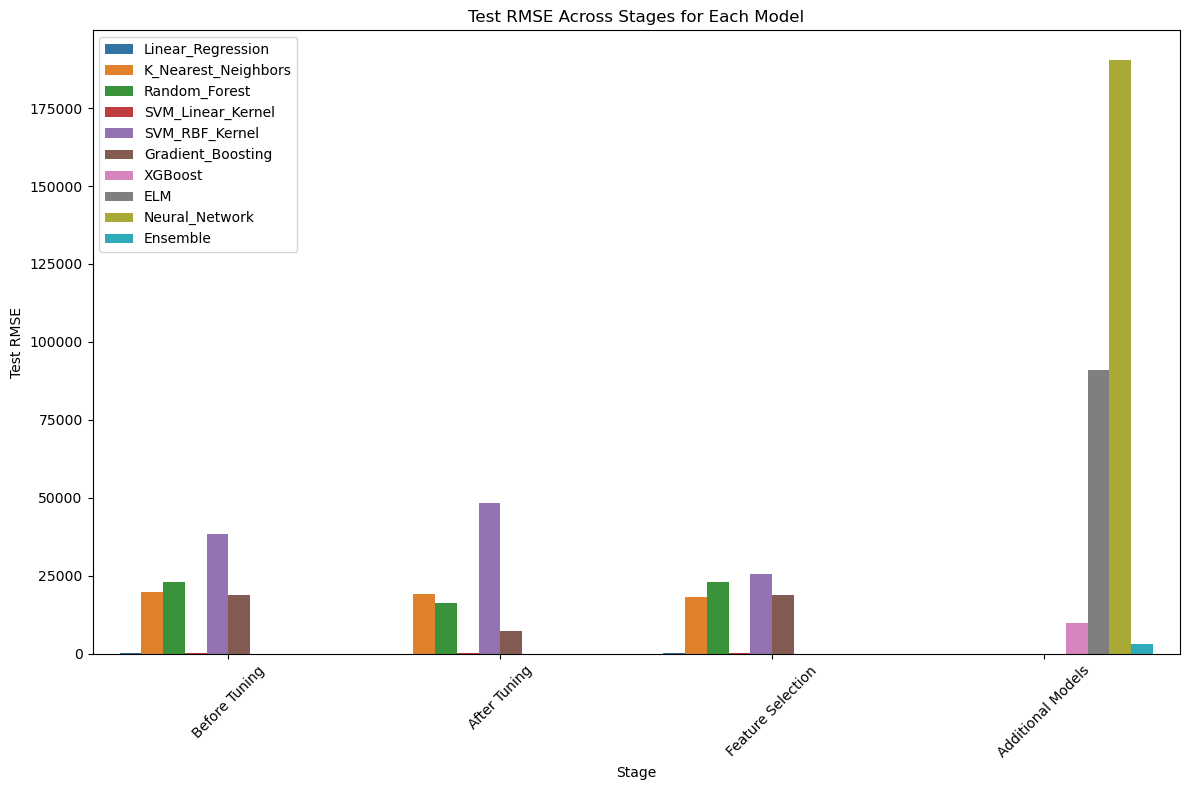

In [74]:
# Plot Test RMSE across stages for each model
plt.figure(figsize=(12, 8))
sns.barplot(data=loaded_results, x="Stage", y="Test_RMSE", hue="Model_Name")
plt.title("Test RMSE Across Stages for Each Model")
plt.xlabel("Stage")
plt.ylabel("Test RMSE")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

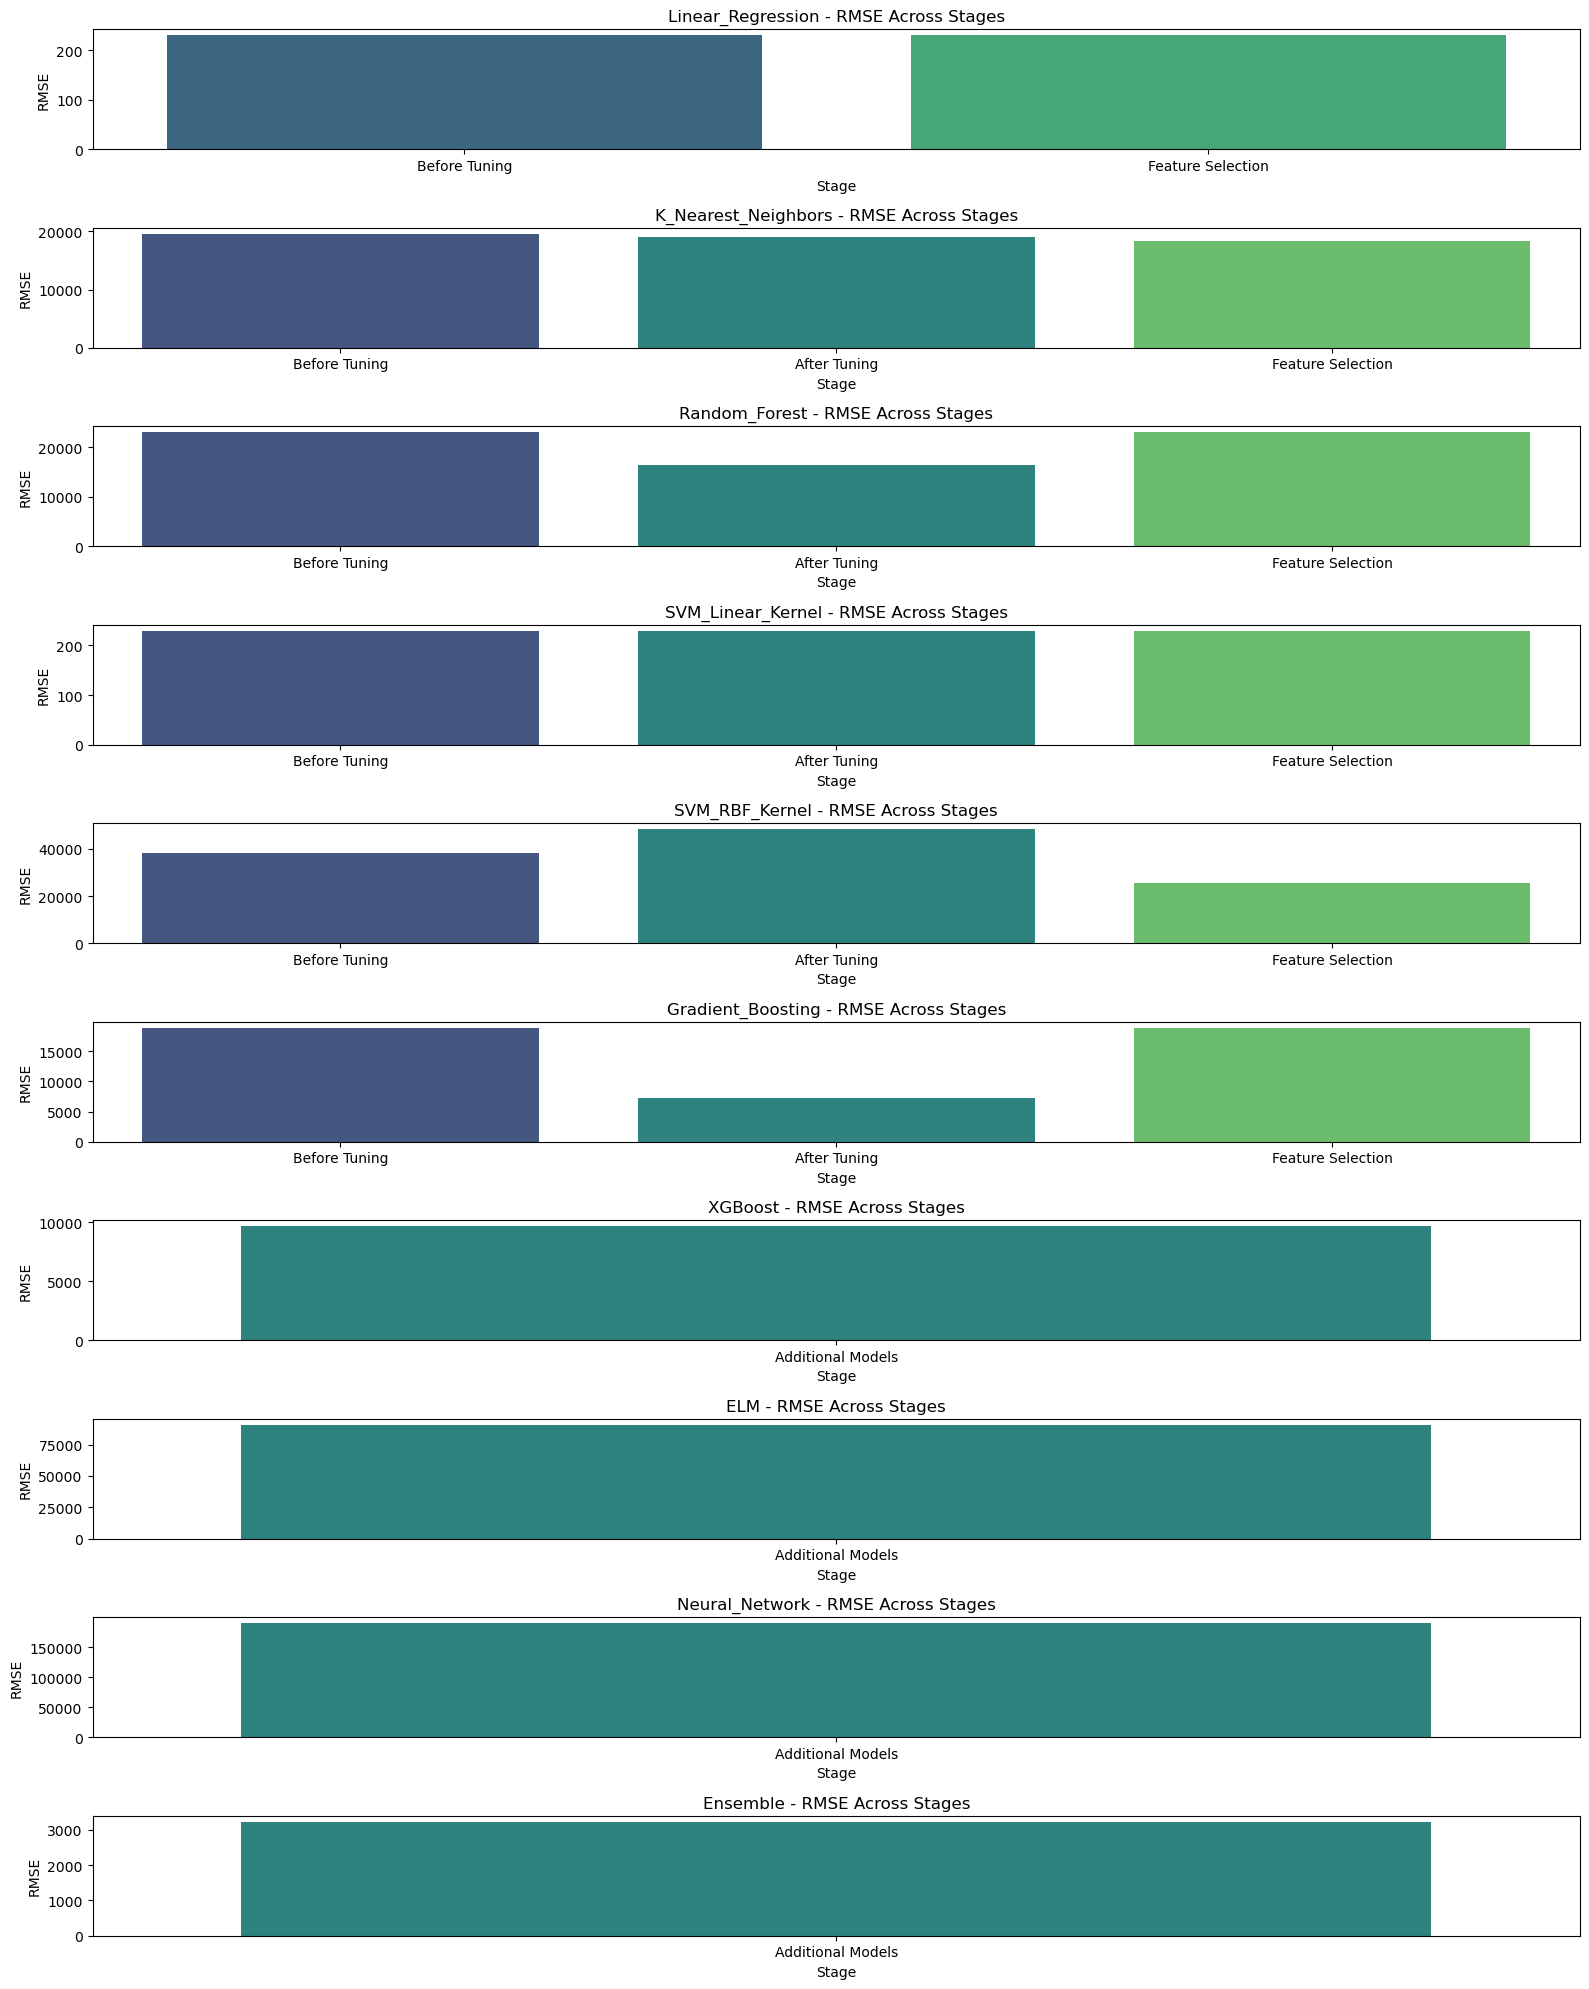

In [82]:
# Get the list of unique model names
models = loaded_results["Model_Name"].unique()

# Create subplots for each model
plt.figure(figsize=(16, 20))
for i, model in enumerate(models, 1):
    plt.subplot(len(models), 1, i)
    model_data = loaded_results[loaded_results["Model_Name"] == model]
    sns.barplot(data=model_data, x="Stage", y="Test_RMSE", palette="viridis")
    plt.title(f"{model} - RMSE Across Stages")
    plt.xlabel("Stage")
    plt.ylabel("RMSE")
    plt.xticks()

plt.tight_layout()
plt.show()

### Save Best Model Dynamically and Predict Future Data

In [81]:
# Identify the best model based on Test RMSE
best_model_row = loaded_results.loc[loaded_results["Test_RMSE"].idxmin()]
print("Best Model:", best_model_row["Model_Name"])
print("Details:\n", best_model_row)

Best Model: SVM_Linear_Kernel
Details:
 Model_Name    SVM_Linear_Kernel
Train_RMSE           370.072267
Test_RMSE            229.977098
Train_R2               0.999955
Test_R2                0.999983
Stage             Before Tuning
Name: 3, dtype: object


In [84]:
from joblib import dump

best_model_name = best_model_row["Model_Name"]
print(f"Best Model Identified: {best_model_name}")

best_model = models_original[best_model_name]

# Save the best model to a file
model_filename = f"best_model_{best_model_name}.joblib"
dump(best_model, model_filename)
print(f"Best model saved as: {model_filename}")


Best Model Identified: SVM_Linear_Kernel
Best model saved as: best_model_SVM_Linear_Kernel.joblib


In [85]:
# Save the scaler for future use
dump(scaler, "scaler.joblib")

['scaler.joblib']

**Summary: Why SVM_Linear_Kernel?**

The SVM_Linear_Kernel model achieves the lowest Test RMSE (229.98) compared to other models.
It shows an almost perfect 𝑅2 score on both the training and testing sets (𝑅2≈1), indicating the model explains nearly all the variance in the target variable. The small difference between Train RMSE and Test RMSE suggests the model generalizes well and avoids overfitting or underfitting.

**Comparison with Other Regular Models:** Compared to other baseline models (e.g., KNN, Random Forest, Gradient Boosting, XGboost, Neural Network), SVM_Linear_Kernel consistently outperformed by delivering higher accuracy and better generalization. Other models likely had slightly higher variance in predictions, as reflected in their higher RMSE or lower R2 Score.

**Importance of Stage:**
* The results were achieved before hyperparameter tuning, meaning this is the raw performance of the model without fine adjustments.
* This makes the SVM_Linear_Kernel a strong candidate for further optimization, as it already performs exceptionally well in its default configuration.
